In [1]:
library(monocle)

Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain

In [2]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [3]:
library(ggplot2)
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




In [4]:
library(plotly)


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [5]:

## remove the x-axis text and tick
## plot.margin to adjust the white space between each plot.
## ... pass any arguments to VlnPlot in Seurat
modify_vlnplot<- function(obj, 
                          feature, 
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  p<- VlnPlot(obj, features = feature, pt.size = pt.size, ... )  + 
    xlab("") + ylab(feature) + ggtitle("") + 
    theme(legend.position = "none", 
          axis.text.x = element_blank(), 
          axis.ticks.x = element_blank(), 
          axis.title.y = element_text(size = rel(1), angle = 0), 
          axis.text.y = element_text(size = rel(1)), 
          plot.margin = plot.margin ) 
  return(p)
}

## extract the max value of the y axis
extract_max<- function(p){
  ymax<- max(ggplot_build(p)$layout$panel_scales_y[[1]]$range$range)
  return(ceiling(ymax))
}


## main function
StackedVlnPlot<- function(obj, features,
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  
  plot_list<- purrr::map(features, function(x) modify_vlnplot(obj = obj,feature = x, ...))
  
  # Add back x-axis title to bottom plot. patchwork is going to support this?
  plot_list[[length(plot_list)]]<- plot_list[[length(plot_list)]] +
    theme(axis.text.x=element_text(), axis.ticks.x = element_line())
  
  # change the y-axis tick to only max value 
  ymaxs<- purrr::map_dbl(plot_list, extract_max)
  plot_list<- purrr::map2(plot_list, ymaxs, function(x,y) x + 
                            scale_y_continuous(breaks = c(y)) + 
                            expand_limits(y = y))

  p<- patchwork::wrap_plots(plotlist = plot_list, ncol = 1)
  return(p)
}

In [6]:
load(file="0710.MGUSAL.merge.seurat.Rda")

In [7]:
allPC3merge<-allPC3

In [8]:
load(file="0711-ob.integratve-7samples.Rda")

In [9]:
allPC3integrate<-ob.integrated

In [10]:
allPC3merge

An object of class Seurat 
20868 features across 14081 samples within 1 assay 
Active assay: RNA (20868 features, 3000 variable features)
 2 dimensional reductions calculated: pca, umap

In [11]:
allPC3integrate

An object of class Seurat 
22868 features across 14081 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [12]:
metaallPC3merge<-allPC3merge@meta.data

In [13]:
metaallPC3integrate<-allPC3integrate@meta.data

In [14]:
colnames(metaallPC3integrate)

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "percent.mt"             "percent.ig"             "integrated_snn_res.0.1"
 [7] "integrated_snn_res.0.2" "integrated_snn_res.0.3" "integrated_snn_res.0.4"
[10] "integrated_snn_res.0.5" "integrated_snn_res.0.6" "integrated_snn_res.0.7"
[13] "integrated_snn_res.0.8" "integrated_snn_res.0.9" "integrated_snn_res.1"  
[16] "seurat_clusters"

In [15]:
colnames(metaallPC3merge)

[1] "orig.ident"      "nCount_RNA"      "nFeature_RNA"    "percent.mt"     
 [5] "percent.ig"      "RNA_snn_res.0.1" "RNA_snn_res.0.2" "RNA_snn_res.0.3"
 [9] "RNA_snn_res.0.4" "RNA_snn_res.0.5" "RNA_snn_res.0.6" "RNA_snn_res.0.7"
[13] "RNA_snn_res.0.8" "RNA_snn_res.0.9" "RNA_snn_res.1"   "seurat_clusters"

In [16]:
metaallPC3merge$unilabel<-paste(metaallPC3merge$orig.ident,metaallPC3merge$percent.mt,metaallPC3merge$"nCount_RNA",metaallPC3merge$"nFeature_RNA",sep="_")

In [17]:
metaallPC3integrate$unilabel<-paste(metaallPC3integrate$orig.ident,metaallPC3integrate$percent.mt,metaallPC3integrate$"nCount_RNA",metaallPC3integrate$"nFeature_RNA",sep="_")

In [18]:
rownames(metaallPC3integrate)<-metaallPC3integrate$unilabel

In [19]:
metaallPC3integrate<-metaallPC3integrate[metaallPC3merge$unilabel,]

In [20]:
allPC3merge@meta.data$mylabel<-allPC3integrate@meta.data$seurat_clusters

In [21]:
options(repr.plot.height=8,repr.plot.width=8)

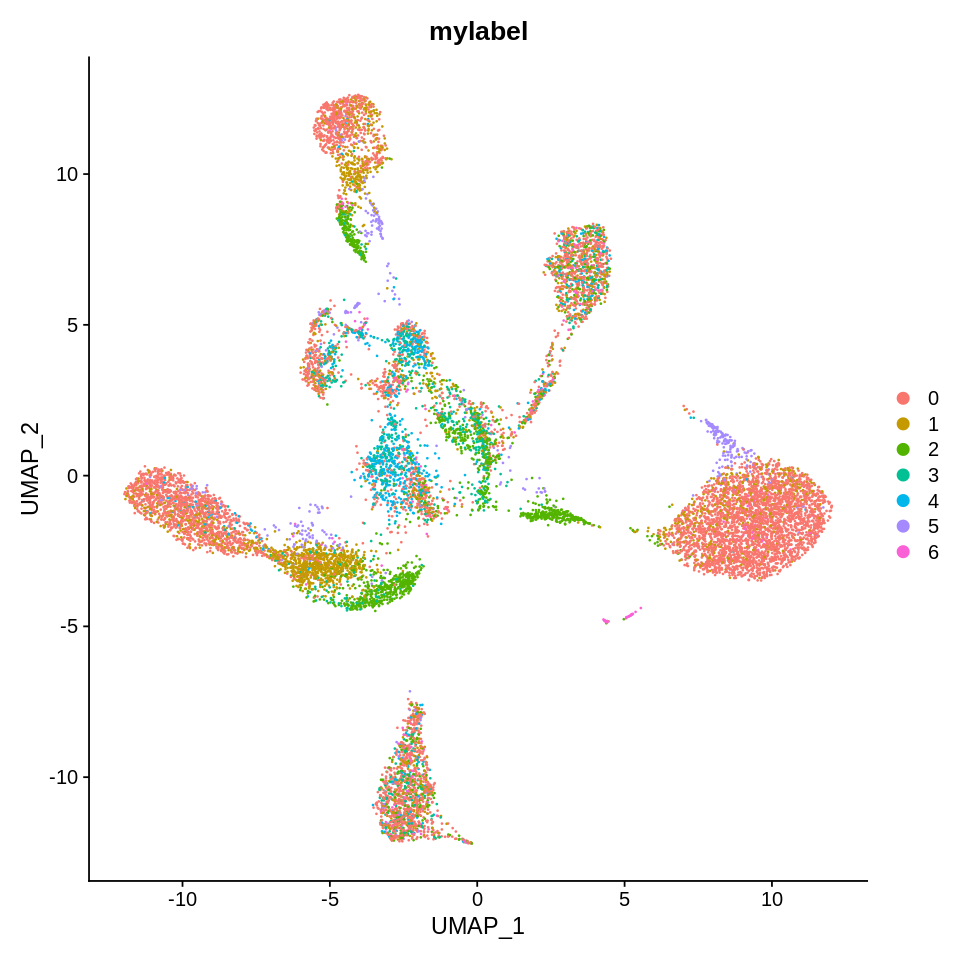

In [22]:
DimPlot(allPC3merge, reduction = "umap",group.by="mylabel",label=F)

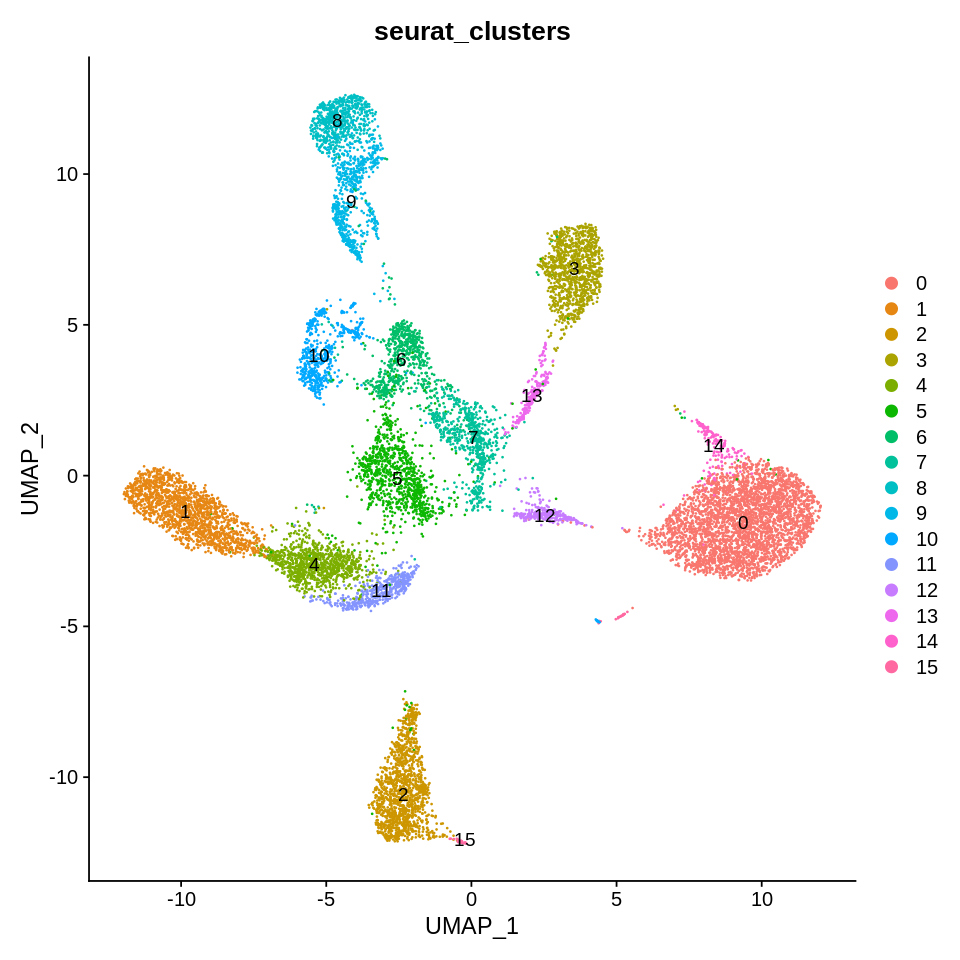

In [23]:
DimPlot(allPC3merge, reduction = "umap",group.by="seurat_clusters",label=T)

In [24]:
allPC3merge@meta.data$orig.ident<-gsub('public','normal',allPC3merge@meta.data$orig.ident)

In [25]:
table(allPC3merge@meta.data$orig.ident)


 MGUSPC1  MGUSPC2 normalPC   pALPC1   pALPC2   pALPC3 
    1550     1789     1071     3675     1806     4190 

In [26]:
allPC3integrate@meta.data$mylabel<-paste(allPC3merge@meta.data$orig.ident,allPC3merge@meta.data$seurat_clusters,sep='.')

In [27]:
table<-allPC3integrate@meta.data

In [28]:
table2<-table[which(table$mylabel%in%c(paste('pALPC1',c(0:4,8,9,11:15),sep="."),paste('pALPC2',c(0:4,8,9,11:15),sep="."),paste('pALPC3',c(0:4,8,9,11:15),sep="."))),]

In [29]:
dim(table2)

[1] 8404   17

In [30]:
allPC3integrateban<-subset(allPC3integrate, cells=rownames(table2))

In [31]:
allPC3integrateban

An object of class Seurat 
22868 features across 8404 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [32]:
table(allPC3integrateban@meta.data$orig.ident)


pALPC1 pALPC2 pALPC3 
  3176   1295   3933 

In [33]:
Idents(object =allPC3integrateban) <- "seurat_clusters"

In [34]:
allPC3integrateban

An object of class Seurat 
22868 features across 8404 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [35]:
allPC4<-subset(allPC3integrateban,ident=c(0,1,5,2))

In [36]:
data <- as(as.matrix(allPC4@assays$integrated@data), 'sparseMatrix') 
pd <- new('AnnotatedDataFrame', data = allPC4@meta.data)  

In [37]:
fData <- data.frame(gene_short_name = row.names(data), row.names = row.names(data))

In [38]:
fd <- new('AnnotatedDataFrame', data = fData)       
monocle_cds <- newCellDataSet(data,phenoData = pd,featureData = fd,lowerDetectionLimit = 0.5,expressionFamily = negbinomial.size())

In [39]:
options(warn=-1)
monocle_cds <- estimateSizeFactors(monocle_cds)
monocle_cds <- estimateDispersions(monocle_cds)

Removing 6 outliers



In [40]:
colnames(pData(monocle_cds))

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "percent.mt"             "percent.ig"             "integrated_snn_res.0.1"
 [7] "integrated_snn_res.0.2" "integrated_snn_res.0.3" "integrated_snn_res.0.4"
[10] "integrated_snn_res.0.5" "integrated_snn_res.0.6" "integrated_snn_res.0.7"
[13] "integrated_snn_res.0.8" "integrated_snn_res.0.9" "integrated_snn_res.1"  
[16] "seurat_clusters"        "mylabel"                "Size_Factor"

In [41]:
pData(monocle_cds)$Cluster <- pData(monocle_cds)$mylabel
clustering_DEG_genes <-row.names(subset(fData(monocle_cds))) 

In [42]:
diff_test_res <- differentialGeneTest(monocle_cds,fullModelFormulaStr = "~Cluster")

In [43]:
ordering_genes <- row.names (subset(diff_test_res, qval < 0.05))
length(ordering_genes)

[1] 965

In [44]:
monocle_cds <-setOrderingFilter(monocle_cds,ordering_genes)

In [45]:
monocle_cds <-reduceDimension(monocle_cds,max_components = 2,method = 'DDRTree')

In [46]:
options(warn=-1)
monocle_cds <-orderCells(monocle_cds)

In [50]:
options(repr.plot.height=8,repr.plot.width=7)

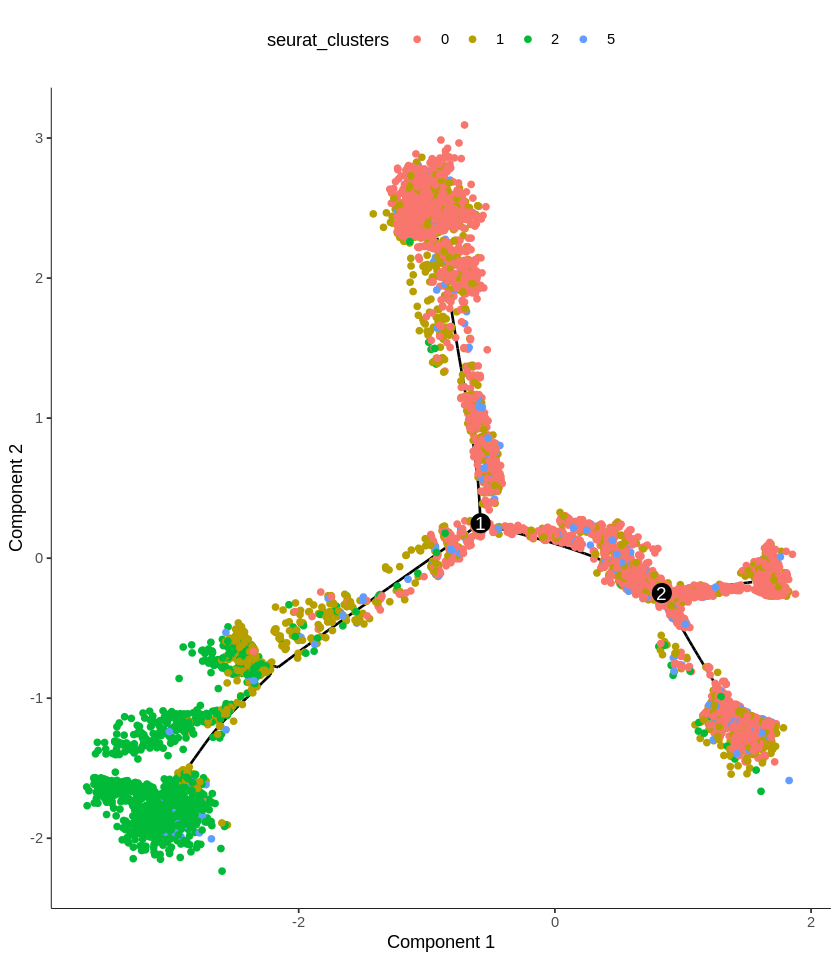

In [51]:
cols_1<-c('#F8766D','#B79F00','#00BA38','#619CFF')
plot_cell_trajectory(monocle_cds, color_by = "seurat_clusters",pt.size=0.01)+
scale_colour_manual(
  values = cols_1
)

In [52]:
ggsave("fig.2.9.pdf",height=8,width=7)
dev.off()

null device 
          1

In [53]:
options(repr.plot.height=5,repr.plot.width=14)

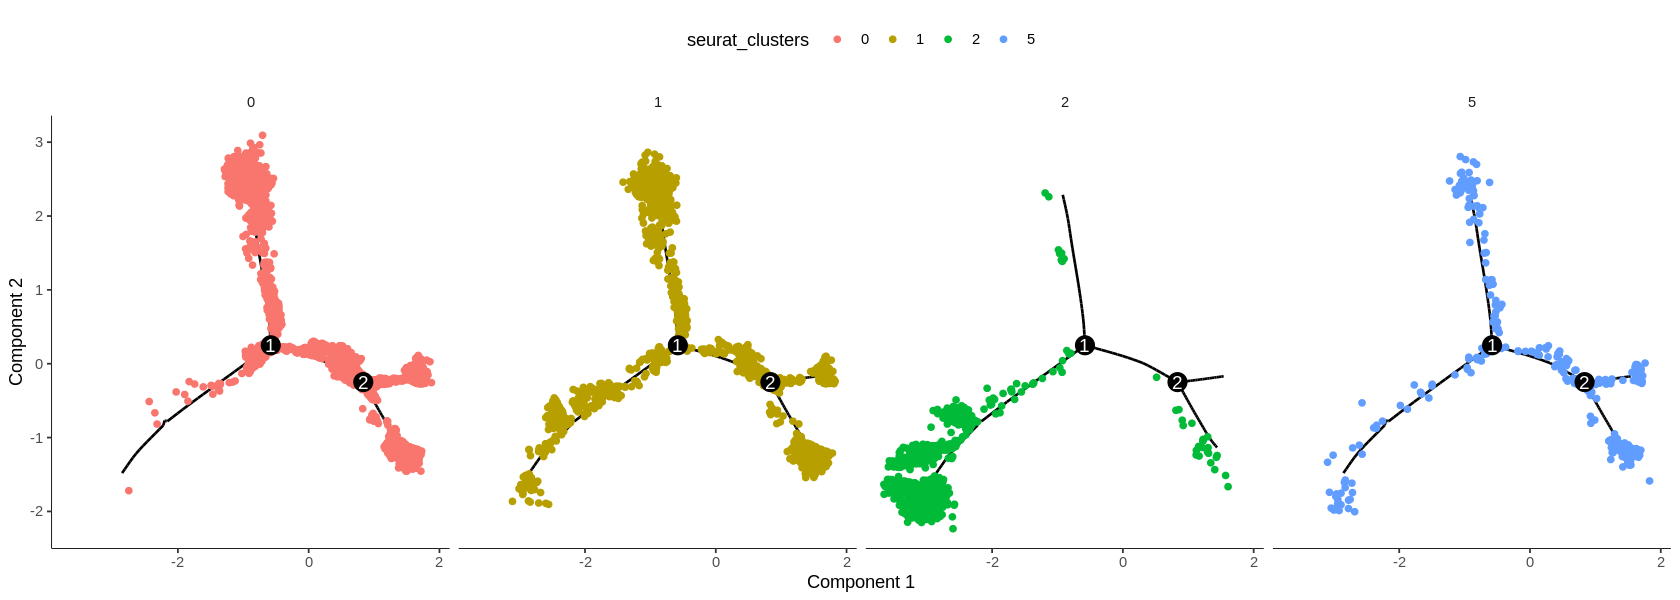

In [54]:
plot_cell_trajectory(monocle_cds, color_by = "seurat_clusters") +facet_wrap(~seurat_clusters, nrow = 1)+
scale_colour_manual(
  values = cols_1
)

In [55]:
ggsave("fig.s2.11.pdf",height=5,width=14)
dev.off()

null device 
          1

In [56]:
options(repr.plot.height=8,repr.plot.width=7)

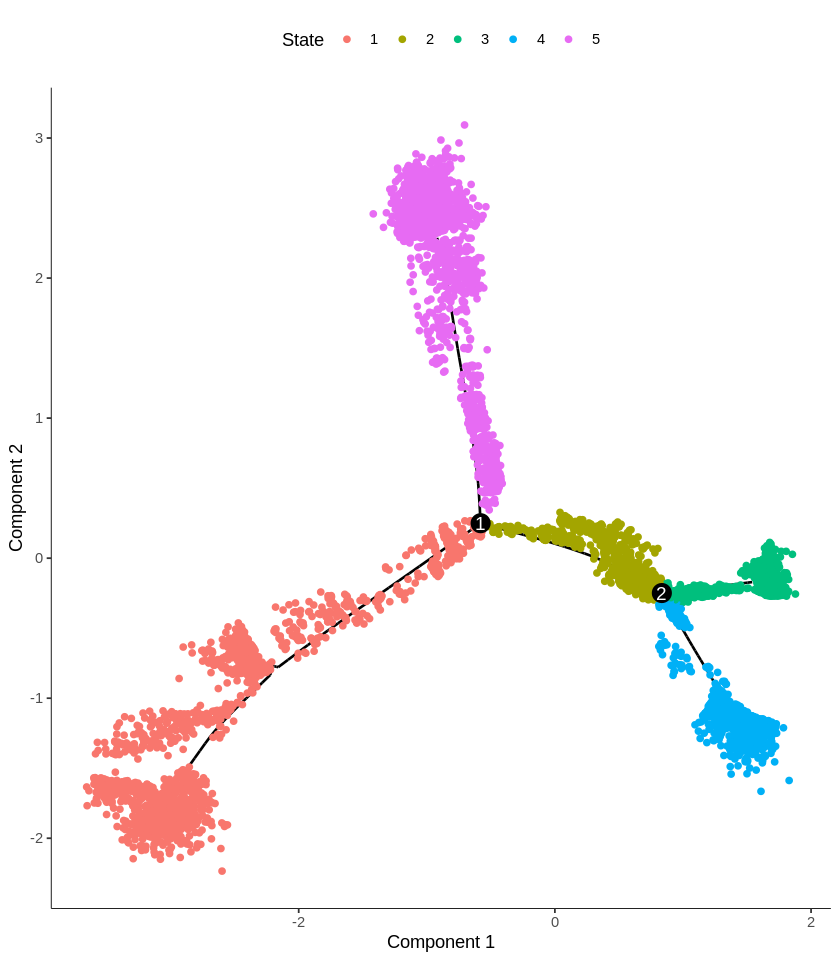

In [57]:
plot_cell_trajectory(monocle_cds, color_by = "State",pt.size=0.1)

In [58]:
options(warn=-1)
monocle_cds <-orderCells(monocle_cds, root_state =5)

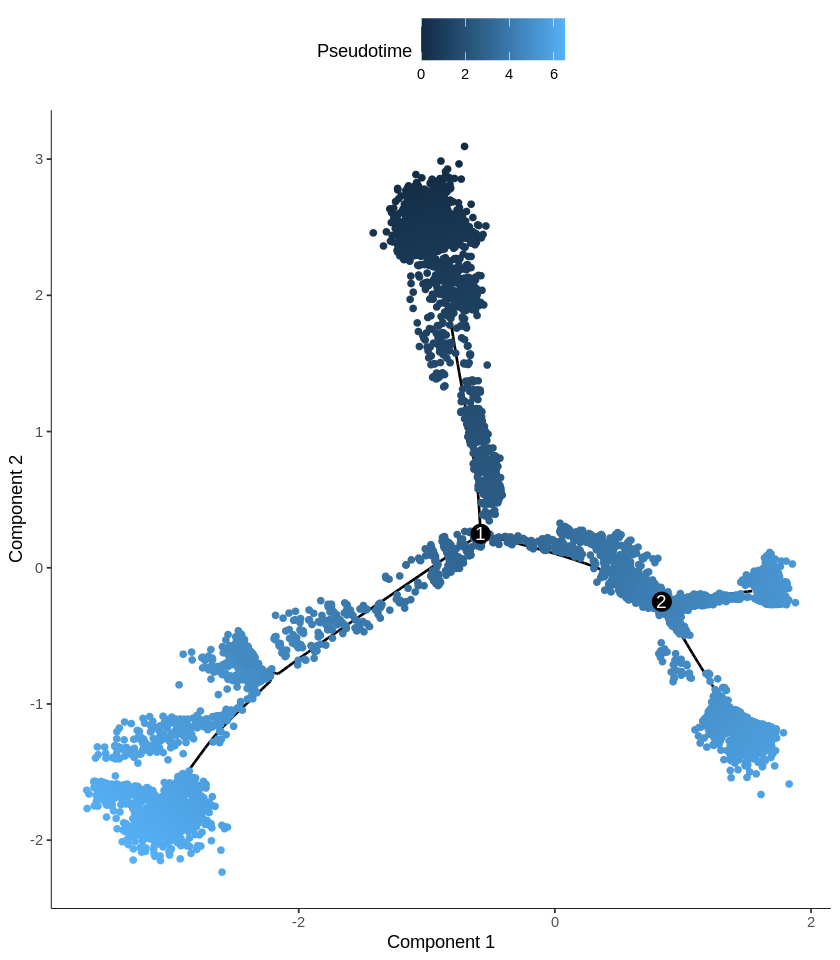

In [59]:
plot_cell_trajectory(monocle_cds, color_by = "Pseudotime",pt.size=0.1)

In [60]:
ggsave("fig.s2.10.pdf",height=8,width=7)
dev.off()

null device 
          1

In [61]:
monocle_cdsAL1052<-monocle_cds

In [62]:
save(monocle_cdsAL1052,file='0926-monocle_cdsAL1052.Rda')

In [63]:
load(file='0926-monocle_cdsAL1052.Rda')

In [64]:
monocle_cds<-monocle_cdsAL1052

In [65]:
BEAM_res=BEAM(monocle_cds,branch_point = 1,cores = 1)
#会返回每个基因的显著性，显著的基因就是那些随不同branch变化的基因
#这一步很慢
BEAM_res=BEAM_res[,c("gene_short_name","pval","qval")]

In [66]:
options(repr.plot.height=15,repr.plot.width=8)

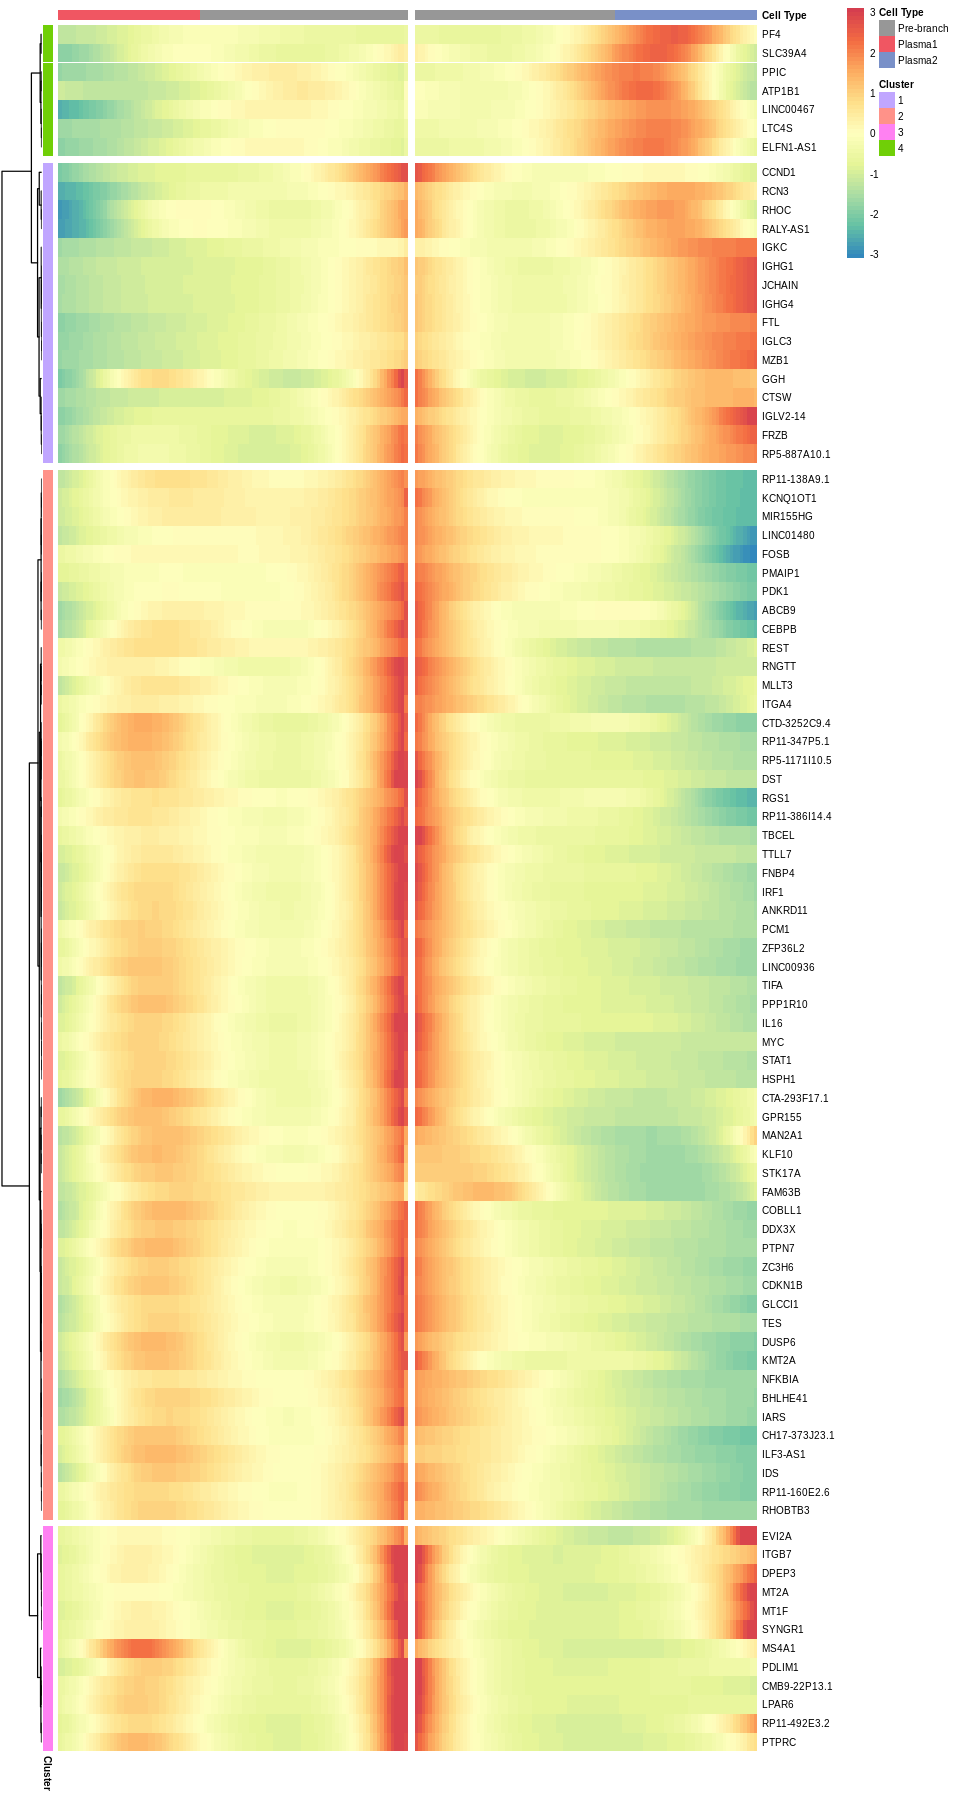

In [67]:
library(RColorBrewer)
tmp1=plot_genes_branched_heatmap(monocle_cds[row.names(subset(BEAM_res,qval<1e-6)),],
                                 branch_point = 1,
                                 num_clusters = 4, #这些基因被分成几个group
                                 cores = 1,
                                 branch_labels = c("Plasma1", "Plasma2"),
                                 #hmcols = NULL, #默认值
                                 hmcols = colorRampPalette(rev(brewer.pal(9, "Spectral")))(62),
                                 branch_colors = c("#979797", "#F05662", "#7990C8"), #pre-branch, Cell fate 1, Cell fate 2分别用什么颜色
                                 use_gene_short_name = T,
                                 show_rownames = T,
                                 return_heatmap = T #是否返回一些重要信息
)

In [68]:
row.names(subset(BEAM_res,qval<1e-6))

[1] "IGLC3"         "JCHAIN"        "IGLV2-14"      "IGHG1"        
 [5] "IGKC"          "RGS1"          "FRZB"          "DUSP6"        
 [9] "LINC01480"     "MYC"           "TBCEL"         "RP5-887A10.1" 
[13] "ZFP36L2"       "MT2A"          "ABCB9"         "RP11-386I14.4"
[17] "CTSW"          "NFKBIA"        "PMAIP1"        "DPEP3"        
[21] "PF4"           "MS4A1"         "CCND1"         "GGH"          
[25] "KCNQ1OT1"      "IGHG4"         "RP5-1171I10.5" "RP11-492E3.2" 
[29] "IRF1"          "MT1F"          "FOSB"          "CTD-3252C9.4" 
[33] "RP11-138A9.1"  "STAT1"         "KLF10"         "CH17-373J23.1"
[37] "RNGTT"         "CMB9-22P13.1"  "LINC00936"     "SYNGR1"       
[41] "LPAR6"         "CEBPB"         "RP11-347P5.1"  "CTA-293F17.1" 
[45] "PDK1"          "MIR155HG"      "LTC4S"         "ITGB7"        
[49] "PDLIM1"        "RHOC"          "ANKRD11"       "PPIC"         
[53] "TTLL7"         "ELFN1-AS1"     "ATP1B1"        "HSPH1"        
[57] "EVI2A"         "TIFA"          "LINC00467"     "IL16"         
[61] "RP11-160E2.6"  "PTPRC"         "BHLHE41"       "GLCCI1"       
[65] "MLLT3"         "KMT2A"         "DDX3X"         "IDS"          
[69] "GPR155"        "DST"           "PPP1R10"       "PTPN7"        
[73] "COBLL1"        "MAN2A1"        "RHOBTB3"       "REST"         
[77] "IARS"          "ZC3H6"         "STK17A"        "ILF3-AS1"     
[81] "FAM63B"        "TES"           "FNBP4"         "SLC39A4"      
[85] "MZB1"          "FTL"           "ITGA4"         "PCM1"         
[89] "RALY-AS1"      "RCN3"          "CDKN1B"

In [69]:
sig_genes2<-intersect(rownames(monocle_cds),c('TP53','MDM4','PRDM1','B4GALT1','CTSW','MZB1','CCND1','MS4A1','PTPRC','KMT2A','STAT1','MYC','CTNNB1','ZNF711','PMAIP1','FOSB','MZB1','CTSW','APOE','C1QC','C1QB','C1QA'))

In [70]:
options(repr.plot.height=6,repr.plot.width=8)

<simpleError in w.y.check(w = w, y = y, Is.nonnegative.y = TRUE, Is.integer.y = TRUE,     ncol.w.max = Inf, ncol.y.max = Inf, out.wy = TRUE, colsyperw = 1,     maximize = TRUE): response variable 'y' must be 0 or positive-valued>
<simpleError in w.y.check(w = w, y = y, Is.nonnegative.y = TRUE, Is.integer.y = TRUE,     ncol.w.max = Inf, ncol.y.max = Inf, out.wy = TRUE, colsyperw = 1,     maximize = TRUE): response variable 'y' must be 0 or positive-valued>
<simpleError in w.y.check(w = w, y = y, Is.nonnegative.y = TRUE, Is.integer.y = TRUE,     ncol.w.max = Inf, ncol.y.max = Inf, out.wy = TRUE, colsyperw = 1,     maximize = TRUE): response variable 'y' must be 0 or positive-valued>
<simpleError in w.y.check(w = w, y = y, Is.nonnegative.y = TRUE, Is.integer.y = TRUE,     ncol.w.max = Inf, ncol.y.max = Inf, out.wy = TRUE, colsyperw = 1,     maximize = TRUE): response variable 'y' must be 0 or positive-valued>


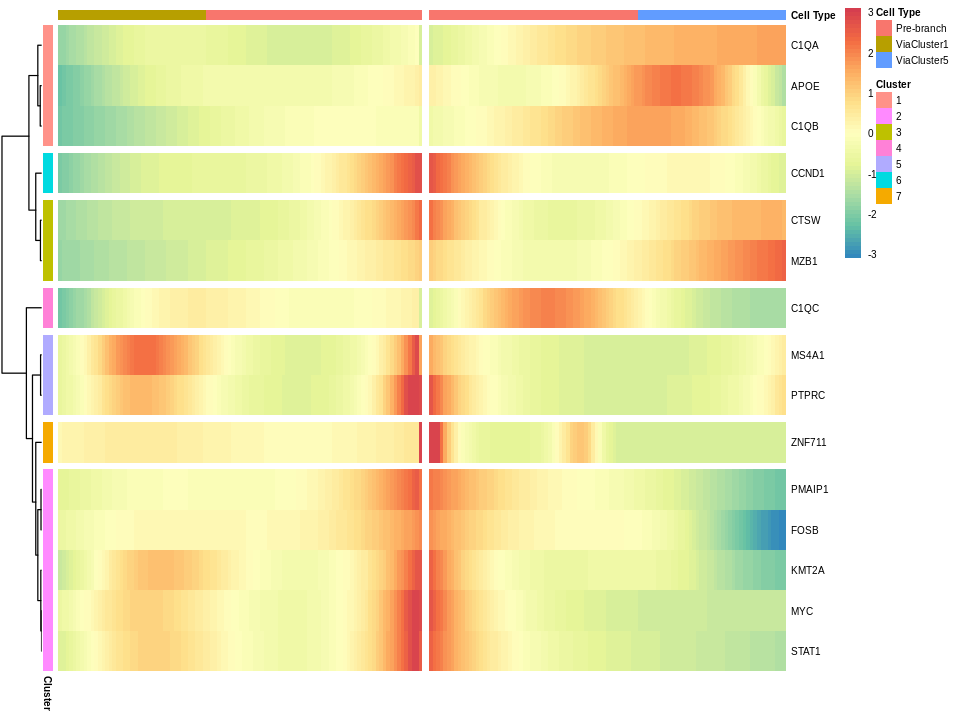

In [97]:
library(RColorBrewer)
tmp1<-plot_genes_branched_heatmap(monocle_cds[sig_genes2,],
                                 branch_point = 1,
                                 num_clusters = 7, #这些基因被分成几个group
                                 cores = 1,
                                 branch_labels = c("ViaCluster1", "ViaCluster5"),
                                 #hmcols = NULL, #默认值
                                 hmcols = colorRampPalette(rev(brewer.pal(9, "Spectral")))(62),
                                 branch_colors = c('#F8766D','#B79F00','#619CFF'), #pre-branch, Cell fate 1, Cell fate 2分别用什么颜色
                                 use_gene_short_name = T,
                                 show_rownames = T,
                                 return_heatmap = T, #是否返回一些重要信息
)

In [99]:
plot_genes_branched_heatmap2<-function (cds_subset, branch_point = 1, branch_states = NULL, 
    branch_labels = c("Cell fate 1", "Cell fate 2"), cluster_rows = TRUE, 
    hclust_method = "ward.D2", num_clusters = 6, hmcols = NULL, 
    branch_colors = c("#979797", "#F05662", "#7990C8"), add_annotation_row = NULL, 
    add_annotation_col = NULL, show_rownames = FALSE, use_gene_short_name = TRUE, 
    scale_max = 3, scale_min = -3, norm_method = c("log", "vstExprs"), 
    trend_formula = "~sm.ns(Pseudotime, df=3) * Branch", return_heatmap = FALSE, 
    cores = 1, ...) 
{
    cds <- NA
    new_cds <- buildBranchCellDataSet(cds_subset, branch_states = branch_states, 
        branch_point = branch_point, progenitor_method = "duplicate", 
        ...)
    new_cds@dispFitInfo <- cds_subset@dispFitInfo
    if (is.null(branch_states)) {
        progenitor_state <- subset(pData(cds_subset), Pseudotime == 
            0)[, "State"]
        branch_states <- setdiff(pData(cds_subset)$State, progenitor_state)
    }
    col_gap_ind <- 101
    newdataA <- data.frame(Pseudotime = seq(0, 100, length.out = 100), 
        Branch = as.factor(unique(as.character(pData(new_cds)$Branch))[1]))
    newdataB <- data.frame(Pseudotime = seq(0, 100, length.out = 100), 
        Branch = as.factor(unique(as.character(pData(new_cds)$Branch))[2]))
    BranchAB_exprs <- genSmoothCurves(new_cds[, ], cores = cores, 
        trend_formula = trend_formula, relative_expr = T, new_data = rbind(newdataA, 
            newdataB))
    BranchA_exprs <- BranchAB_exprs[, 1:100]
    BranchB_exprs <- BranchAB_exprs[, 101:200]
    common_ancestor_cells <- row.names(pData(new_cds)[pData(new_cds)$State == 
        setdiff(pData(new_cds)$State, branch_states), ])
    BranchP_num <- (100 - floor(max(pData(new_cds)[common_ancestor_cells, 
        "Pseudotime"])))
    BranchA_num <- floor(max(pData(new_cds)[common_ancestor_cells, 
        "Pseudotime"]))
    BranchB_num <- BranchA_num
    norm_method <- match.arg(norm_method)
    if (norm_method == "vstExprs") {
        BranchA_exprs <- vstExprs(new_cds, expr_matrix = BranchA_exprs)
        BranchB_exprs <- vstExprs(new_cds, expr_matrix = BranchB_exprs)
    }
    else if (norm_method == "log") {
        BranchA_exprs <- log10(BranchA_exprs + 1)
        BranchB_exprs <- log10(BranchB_exprs + 1)
    }
    heatmap_matrix <- cbind(BranchA_exprs[, (col_gap_ind - 1):1], 
        BranchB_exprs)
    heatmap_matrix = heatmap_matrix[!apply(heatmap_matrix, 1, 
        sd) == 0, ]
    heatmap_matrix = Matrix::t(scale(Matrix::t(heatmap_matrix), 
        center = TRUE))
    heatmap_matrix = heatmap_matrix[is.na(row.names(heatmap_matrix)) == 
        FALSE, ]
    heatmap_matrix[is.nan(heatmap_matrix)] = 0
    heatmap_matrix[heatmap_matrix > scale_max] = scale_max
    heatmap_matrix[heatmap_matrix < scale_min] = scale_min
    heatmap_matrix_ori <- heatmap_matrix
    heatmap_matrix <- heatmap_matrix[is.finite(heatmap_matrix[, 
        1]) & is.finite(heatmap_matrix[, col_gap_ind]), ]
    row_dist <- as.dist((1 - cor(Matrix::t(heatmap_matrix)))/2)
    row_dist[is.na(row_dist)] <- 1
    exp_rng <- range(heatmap_matrix)
    bks <- seq(exp_rng[1] - 0.1, exp_rng[2] + 0.1, by = 0.1)
    if (is.null(hmcols)) {
        hmcols <- blue2green2red(length(bks) - 1)
    }
    ph <- pheatmap(heatmap_matrix, useRaster = T, cluster_cols = FALSE, 
        cluster_rows = TRUE, show_rownames = F, show_colnames = F, 
        clustering_distance_rows = row_dist, clustering_method = hclust_method, 
        cutree_rows = num_clusters, silent = TRUE, filename = '1004.pheatmaptry.1.pdf', 
        breaks = bks, color = hmcols)
    annotation_row <- data.frame(Cluster = factor(cutree(ph$tree_row, 
        num_clusters)))
    if (!is.null(add_annotation_row)) {
        annotation_row <- cbind(annotation_row, add_annotation_row[row.names(annotation_row), 
            ])
    }
    colnames(heatmap_matrix) <- c(1:ncol(heatmap_matrix))
    annotation_col <- data.frame(row.names = c(1:ncol(heatmap_matrix)), 
        `Cell Type` = c(rep(branch_labels[1], BranchA_num), rep("Pre-branch", 
            2 * BranchP_num), rep(branch_labels[2], BranchB_num)))
    colnames(annotation_col) <- "Cell Type"
    if (!is.null(add_annotation_col)) {
        annotation_col <- cbind(annotation_col, add_annotation_col[fData(cds[row.names(annotation_col), 
            ])$gene_short_name, 1])
    }
    names(branch_colors) <- c("Pre-branch", branch_labels[1], 
        branch_labels[2])
    annotation_colors = list(`Cell Type` = branch_colors)
    names(annotation_colors$`Cell Type`) = c("Pre-branch", branch_labels)
    if (use_gene_short_name == TRUE) {
        if (is.null(fData(cds_subset)$gene_short_name) == FALSE) {
            feature_label <- as.character(fData(cds_subset)[row.names(heatmap_matrix), 
                "gene_short_name"])
            feature_label[is.na(feature_label)] <- row.names(heatmap_matrix)
            row_ann_labels <- as.character(fData(cds_subset)[row.names(annotation_row), 
                "gene_short_name"])
            row_ann_labels[is.na(row_ann_labels)] <- row.names(annotation_row)
        }
        else {
            feature_label <- row.names(heatmap_matrix)
            row_ann_labels <- row.names(annotation_row)
        }
    }
    else {
        feature_label <- row.names(heatmap_matrix)
        row_ann_labels <- row.names(annotation_row)
    }
    row.names(heatmap_matrix) <- feature_label
    row.names(annotation_row) <- row_ann_labels
    ph_res <- pheatmap(heatmap_matrix[, ], useRaster = T, cluster_cols = FALSE, 
        cluster_rows = TRUE, show_rownames = show_rownames, show_colnames = F, 
        clustering_distance_rows = row_dist, clustering_method = hclust_method, 
        cutree_rows = num_clusters, annotation_row = annotation_row, 
        annotation_col = annotation_col, annotation_colors = annotation_colors, 
        gaps_col = col_gap_ind, treeheight_row = 20, breaks = bks, 
        fontsize = 6, color = hmcols, border_color = NA, silent = TRUE,filename='fig.2.11.pdf')
    grid::grid.rect(gp = grid::gpar("fill", col = NA))
    grid::grid.draw(ph_res$gtable)
    if (return_heatmap) {
        return(list(BranchA_exprs = BranchA_exprs, BranchB_exprs = BranchB_exprs, 
            heatmap_matrix = heatmap_matrix, heatmap_matrix_ori = heatmap_matrix_ori, 
            ph = ph, col_gap_ind = col_gap_ind, row_dist = row_dist, 
            hmcols = hmcols, annotation_colors = annotation_colors, 
            annotation_row = annotation_row, annotation_col = annotation_col, 
            ph_res = ph_res))
    }
}

In [101]:
library(RColorBrewer)
library(pheatmap)
tmp1<-plot_genes_branched_heatmap2(monocle_cds[sig_genes2,],
                                 branch_point = 1,
                                 num_clusters = 7, #这些基因被分成几个group
                                 cores = 1,
                                 branch_labels = c("ViaCluster1", "ViaCluster5"),
                                 #hmcols = NULL, #默认值
                                 hmcols = colorRampPalette(rev(brewer.pal(9, "Spectral")))(62),
                                 branch_colors = c('#F8766D','#B79F00','#619CFF'), #pre-branch, Cell fate 1, Cell fate 2分别用什么颜色
                                 use_gene_short_name = T,
                                 show_rownames = T,
                                 return_heatmap = T, #是否返回一些重要信息
)

<simpleError in w.y.check(w = w, y = y, Is.nonnegative.y = TRUE, Is.integer.y = TRUE,     ncol.w.max = Inf, ncol.y.max = Inf, out.wy = TRUE, colsyperw = 1,     maximize = TRUE): response variable 'y' must be 0 or positive-valued>
<simpleError in w.y.check(w = w, y = y, Is.nonnegative.y = TRUE, Is.integer.y = TRUE,     ncol.w.max = Inf, ncol.y.max = Inf, out.wy = TRUE, colsyperw = 1,     maximize = TRUE): response variable 'y' must be 0 or positive-valued>
<simpleError in w.y.check(w = w, y = y, Is.nonnegative.y = TRUE, Is.integer.y = TRUE,     ncol.w.max = Inf, ncol.y.max = Inf, out.wy = TRUE, colsyperw = 1,     maximize = TRUE): response variable 'y' must be 0 or positive-valued>
<simpleError in w.y.check(w = w, y = y, Is.nonnegative.y = TRUE, Is.integer.y = TRUE,     ncol.w.max = Inf, ncol.y.max = Inf, out.wy = TRUE, colsyperw = 1,     maximize = TRUE): response variable 'y' must be 0 or positive-valued>
